In [42]:
import pandas as pd
import numpy as np
import os
from wordcloud import WordCloud
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()
import pickle 
pd.set_option('max_colwidth', None)
import tqdm

In [2]:
df = pd.read_csv('tweets_processed.csv')
df.rename(columns={'lemmatized_tweets': 'Tweet', 'VADER_sentiment':'Sentiment'}, inplace=True)
df.head(50)

,Tweet,Sentiment
0,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,Neutral
1,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,Negative
2,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid,Neutral
3,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,Positive
4,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,Positive
5,by now the success of vaccine from and manipulate datum by pfizer about the vaccine be all over the world despite this if a tweet like this come suspect credential of the messager,Positive
6,another achievement in india 's fight against covid corbevax the makeinindia vaccine have be approve for emergency use for child in the age group of year indiafightscorona,Negative
7,australia epidemiologist warn it be too early to unwind covid health measure keep wear mask distance get booster vaccine covid aus covid au mask vaccines vaccination covid longcovid auspol nswpol qldpol saparli springst,Negative
8,multilingual news service arabic february news covid media coronavirus currentaffair breakingnews journalism corona trend latestnew politic article press community vaccine arabic,Neutral
9,ahmedabad have at least new slot available between amp covishield dose dose covaxin dose dose book one now at vaccine cowin covid ahmedabad,Neutral


In [3]:
df.dropna(inplace=True)

## Prepara data for LDA Analysis

In [4]:
stop_words = stopwords.words('english')
stop_words.extend(['covid', 'dose', 'vaccine', 'vaccination', 'amp', 'coronavirus'])


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df['Tweet'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)


In [5]:
print(data_words[2])

['nstnation', 'state', 'health', 'director', 'dr', 'othman', 'warijo', 'say', 'case', 'involve', 'year', 'old', 'girl', 'history', 'asthma', 'receive', 'sultanah', 'bahiyah', 'hospital', 'kedah', 'child', 'pickid']


## WordCloud on Tweets

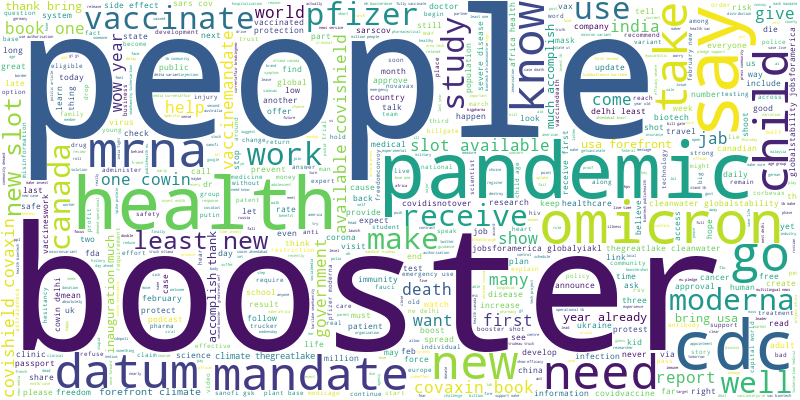

In [6]:
# Join the different processed titles together.
long_string = ','.join([', '.join(x) for x in data_words])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Build a Bi-gram model

In [7]:
data_words[0][:5]

['zydus', 'group', 'announce', 'new', 'brand']

In [8]:
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=2) # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)

In [9]:
print(bigram_model[data_words][0])

['zydus', 'group', 'announce', 'new', 'brand', 'identity', 'list', 'entity', 'group', 'cadila', 'healthcare', 'limit', 'know', 'limit']


In [10]:
norm_corpus_bigrams = [bigram_model[doc] for doc in data_words]

In [16]:
norm_corpus_bigrams[2030]

['wow_year',
 'already_since',
 'inauguration_much',
 'accomplish_thank',
 'bring_usa',
 'forefront_climate',
 'thegreatlake_cleanwater',
 'globalstability_jobsforamerica',
 'globalyiakl']

In [17]:
df.iloc[2030, :]

Tweet        wow it have be a year already since your inauguration and so much accomplish thank you for bring usa to the forefront vaccine climate thegreatlake cleanwater globalstability jobsforamerica summitfordemocracy globalyiakl
Sentiment                                                                                                                                                                                                                       Positive
Name: 2086, dtype: object

In [18]:
# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'announce'), (1, 'brand'), (2, 'cadila'), (3, 'entity'), (4, 'group'), (5, 'healthcare'), (6, 'identity'), (7, 'know'), (8, 'limit'), (9, 'list'), (10, 'new'), (11, 'zydus'), (12, 'address'), (13, 'approve'), (14, 'compromise')]
Total Vocabulary Size: 6435


In [19]:
list(dictionary.items())

[(0, 'announce'),
 (1, 'brand'),
 (2, 'cadila'),
 (3, 'entity'),
 (4, 'group'),
 (5, 'healthcare'),
 (6, 'identity'),
 (7, 'know'),
 (8, 'limit'),
 (9, 'list'),
 (10, 'new'),
 (11, 'zydus'),
 (12, 'address'),
 (13, 'approve'),
 (14, 'compromise'),
 (15, 'concern'),
 (16, 'danger'),
 (17, 'delay'),
 (18, 'diversify'),
 (19, 'effort'),
 (20, 'express'),
 (21, 'hamper'),
 (22, 'inequity'),
 (23, 'leave'),
 (24, 'outcome'),
 (25, 'production'),
 (26, 'proper'),
 (27, 'south_africa'),
 (28, 'take'),
 (29, 'trip'),
 (30, 'tripswaiver'),
 (31, 'waiver'),
 (32, 'asthma'),
 (33, 'bahiyah'),
 (34, 'case'),
 (35, 'child_pickid'),
 (36, 'director'),
 (37, 'dr'),
 (38, 'girl'),
 (39, 'health'),
 (40, 'history'),
 (41, 'hospital'),
 (42, 'involve'),
 (43, 'kedah'),
 (44, 'nstnation'),
 (45, 'othman'),
 (46, 'receive'),
 (47, 'say'),
 (48, 'state'),
 (49, 'sultanah'),
 (50, 'warijo'),
 (51, 'year_old'),
 (52, 'airborne'),
 (53, 'face'),
 (54, 'ff'),
 (55, 'glove'),
 (56, 'immunity'),
 (57, 'kn'),
 (5

## Transforming Corpus into Bag of Words

In [20]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1)]


In [21]:
print(bigram_model[data_words][0])

['zydus', 'group', 'announce', 'new', 'brand', 'identity', 'list', 'entity', 'group', 'cadila', 'healthcare', 'limit', 'know', 'limit']


In [22]:
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[0]])

[('announce', 1), ('brand', 1), ('cadila', 1), ('entity', 1), ('group', 2), ('healthcare', 1), ('identity', 1), ('know', 1), ('limit', 2), ('list', 1), ('new', 1), ('zydus', 1)]


In [23]:
print('Total number of tweets:', len(bow_corpus))

Total number of tweets: 2037


## LDA with 3 Topics

In [35]:
%%time
TOTAL_TOPICS = 3
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=2037, 
                                   alpha='auto', eta='auto', random_state=42,
                                   iterations=500, num_topics=TOTAL_TOPICS, 
                                   passes=20, eval_every=None)

CPU times: total: 4.84 s
Wall time: 4.85 s


In [36]:
for topic_id, topic in lda_model.print_topics(num_topics=TOTAL_TOPICS, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.006*"get" + 0.005*"pandemic" + 0.004*"say" + 0.004*"mandate" + 0.003*"omicron" + 0.003*"health" + 0.003*"booster" + 0.003*"report" + 0.003*"people" + 0.002*"vaccinemandate" + 0.002*"disease" + 0.002*"cdc" + 0.002*"world" + 0.002*"know" + 0.002*"country" + 0.002*"go" + 0.002*"take" + 0.002*"canada" + 0.002*"tell" + 0.002*"like"

Topic #2:
0.004*"people" + 0.004*"say" + 0.004*"inauguration_much" + 0.004*"globalyiakl" + 0.004*"thegreatlake_cleanwater" + 0.004*"forefront_climate" + 0.004*"wow_year" + 0.004*"globalstability_jobsforamerica" + 0.004*"already_since" + 0.004*"bring_usa" + 0.004*"accomplish_thank" + 0.004*"go" + 0.004*"health" + 0.004*"cdc" + 0.003*"booster" + 0.003*"need" + 0.003*"least_new" + 0.003*"book_one" + 0.003*"cowin_delhi" + 0.003*"slot_available"

Topic #3:
0.004*"get" + 0.003*"take" + 0.003*"pfizer" + 0.003*"booster" + 0.003*"say" + 0.003*"news" + 0.003*"pandemic" + 0.003*"make" + 0.003*"people" + 0.002*"new" + 0.002*"virus" + 0.002*"would" + 0.002*"moder

In [37]:
topics_coherences = lda_model.top_topics(bow_corpus, topn=20)
avg_coherence_score = np.mean([item[1] for item in topics_coherences])
print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -10.112769390861507


In [38]:
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('get', 0.006), ('pandemic', 0.005), ('say', 0.004), ('mandate', 0.004), ('omicron', 0.003), ('health', 0.003), ('booster', 0.003), ('report', 0.003), ('people', 0.003), ('vaccinemandate', 0.002), ('disease', 0.002), ('cdc', 0.002), ('world', 0.002), ('know', 0.002), ('country', 0.002), ('go', 0.002), ('take', 0.002), ('canada', 0.002), ('tell', 0.002), ('like', 0.002)]

Topic #2:
[('get', 0.004), ('take', 0.003), ('pfizer', 0.003), ('booster', 0.003), ('say', 0.003), ('news', 0.003), ('pandemic', 0.003), ('make', 0.003), ('people', 0.003), ('new', 0.002), ('virus', 0.002), ('would', 0.002), ('moderna', 0.002), ('world', 0.002), ('read', 0.002), ('time', 0.002), ('year', 0.002), ('use', 0.002), ('research', 0.002), ('government', 0.002)]

Topic #3:
[('people', 0.004), ('say', 0.004), ('inauguration_much', 0.004), ('globalyiakl', 0.004), ('thegreatlake_cleanwater', 0.004), ('forefront_climate', 0.004), ('wow_year', 0.004), ('globalstability_jobsforamer

## Evaluating Topic Model Quality

In [39]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, 
                                                      texts=norm_corpus_bigrams,
                                                      dictionary=dictionary, 
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, 
                                                         texts=norm_corpus_bigrams,
                                                         dictionary=dictionary, 
                                                         coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(bow_corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.33585303962079704
Avg. Coherence Score (UMass): -10.112769390861507
Model Perplexity: -8.266810698265436


## LDA tuning - Finding optimal number of Topics

In [44]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=10, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm.tqdm(range(start_topic_count, end_topic_count+1, step)):
        lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=2037, 
                                   alpha='auto', eta='auto', random_state=42,
                                   iterations=500, num_topics=topic_nums, 
                                   passes=20, eval_every=None)
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                                     texts=texts, dictionary=dictionary, 
                                                                     coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(lda_model)
    
    return models, coherence_scores

In [51]:
num_topics = 10

In [46]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus, texts=norm_corpus_bigrams,
                                                               dictionary=dictionary, start_topic_count=2,
                                                               end_topic_count=num_topics+1, step=1, cpus=4)

100%|██████████| 9/9 [04:07<00:00, 27.52s/it]


In [47]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 11, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
7,9,0.4062
6,8,0.4032
5,7,0.3969
8,10,0.3947
3,5,0.3681
4,6,0.3650
1,3,0.3359
2,4,0.3293
0,2,0.3123


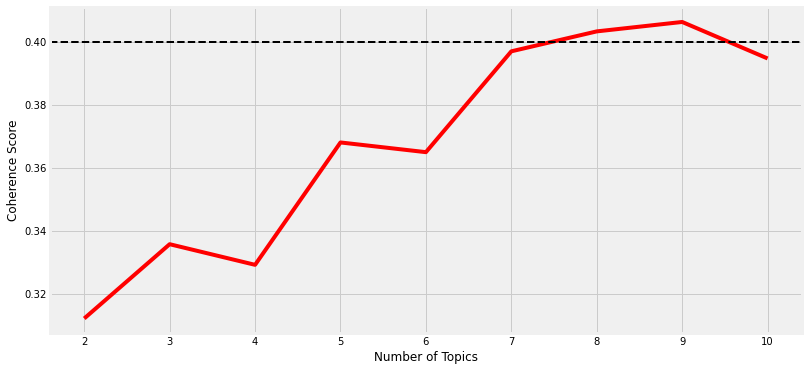

In [53]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

x_ax = range(2, num_topics+1, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.4, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

In [54]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 9].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

9

In [55]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['get', 'health', 'say', 'doctor', 'people', 'cdc', 'report', 'booster', 'pandemic', 'mandate', 'video', 'share', 'vaccinemandate', 'us', 'datum', 'even', 'usa', 'omicron', 'covidvaccine', 'public']

Topic #2:
['forefront_climate', 'globalyiakl', 'inauguration_much', 'thegreatlake_cleanwater', 'globalstability_jobsforamerica', 'wow_year', 'bring_usa', 'already_since', 'accomplish_thank', 'book_one', 'least_new', 'covishield_covaxin', 'slot_available', 'cowin_delhi', 'go', 'people', 'india', 'work', 'country', 'canada']

Topic #3:
['one_cowin', 'available_covishield', 'new_slot', 'covaxin_book', 'get', 'year', 'ahmedabad', 'ahmedabad_least', 'new', 'news', 'booster', 'thank', 'pandemic', 'million', 'would', 'global', 'say', 'know', 'make', 'may']

Topic #4:
['free', 'people', 'study', 'low', 'call', 'side_effect', 'booster', 'february', 'know', 'follow', 'pm', 'get', 'first', 'pandemic_health', 'polio', 'today', 'help', 'say', 'omicron', 'immunity']

Topic #5:
['child', 'manda